# This example demonstrate how to train region classification (standart image classification model).

In [1]:
import os
import sys
import torch
import warnings
from datetime import datetime
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# Nomeroff-Net path
NOMEROFF_NET_DIR = os.path.abspath('../../../../')
sys.path.append(NOMEROFF_NET_DIR)

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [4]:
# # auto download latest dataset
# from nomeroff_net.tools import modelhub

# # auto download latest dataset
# info = modelhub.download_dataset_for_model("numberplate_options")
# PATH_TO_DATASET = info["dataset_path"]

# local path dataset
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

PATH_TO_REG_CUSTOM_DATASET = f'{PATH_TO_DATASET}_base_reg'
PATH_TO_LINE_CUSTOM_DATASET = f'{PATH_TO_DATASET}_base_line'

In [5]:
PATH_TO_DATASET

'/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example'

In [6]:
PATH_TO_REG_CUSTOM_DATASET

'/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg'

In [7]:
PATH_TO_LINE_CUSTOM_DATASET

'/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_line'

In [8]:
DATASET_NAME = "options"
VERSION = f"{datetime.now().strftime('%Y_%m_%d')}_pytorch_lightning"

RESULT_PATH = os.path.join(NOMEROFF_NET_DIR, "./data/models/", 'numberplate_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [9]:
from nomeroff_net.tools import custom_options
from nomeroff_net import OptionsDetector

class_region_custom = [
    ["ru-military","ua-military"],
    "eu-ua-2015",
    "eu-ua-2004",
    "eu-ua-1995",
    "eu",
    "xx-transit",
    "ru",
    "kz",
    "eu-ua-ordlo-dpr",
    "eu-ua-ordlo-lpr",
    "ge",
    "by",
    "su",
    "kg",
    "am"
]

class_count_lines_custom = ["1", "2", "3"]

state_ids_only_labels = ["not filled"]

customOptionsMakerReg = custom_options.CustomOptionsMaker(
    PATH_TO_DATASET,
    PATH_TO_REG_CUSTOM_DATASET, 
    OptionsDetector.get_class_region_all(),
    class_region_custom,
    OptionsDetector.get_class_count_lines_all(),
    class_count_lines_custom,
    OptionsDetector.get_class_state_all(),
    state_ids_only_labels,
    items_per_class = 2
)

customOptionsMakerCountLine = custom_options.CustomOptionsMaker(
    PATH_TO_DATASET,
    PATH_TO_LINE_CUSTOM_DATASET, 
    OptionsDetector.get_class_region_all(),
    class_region_custom,
    OptionsDetector.get_class_count_lines_all(),
    class_count_lines_custom,
    OptionsDetector.get_class_state_all(),
    state_ids_only_labels,
    items_per_class = 2
)

In [10]:
customOptionsMakerCountLine.make()

Creating path "/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_line" for custom options
dir: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example option_dir: train custom_options_sub_dirs[0]: ann
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu-ua-2015-2.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu-ua-ordlo-lpr.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/kg.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/am.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu-ua-1995.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu.json
/mnt/data/var/www/nomeroff-net/./data/dat

In [11]:
customOptionsMakerReg.make()

Creating path "/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg" for custom options
dir: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example option_dir: train custom_options_sub_dirs[0]: ann
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu-ua-2015-2.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu-ua-ordlo-lpr.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/kg.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/am.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu-ua-1995.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu.json
/mnt/data/var/www/nomeroff-net/./data/data

In [12]:
customOptionsMakerReg.rebalance_regions('train', with_aug=False, verbose=True)
customOptionsMakerCountLine.rebalance_count_lines('train', with_aug=False, verbose=True)

Rebalancing is possible only once!
Rebalancing is possible only once!


1

In [13]:
class MyNpClassificator(OptionsDetector):
    def __init__(self):
        OptionsDetector.__init__(self)
        
        # outputs 2
        #self.class_region = class_region_custom
        self.class_region = ["military",
            "eu-ua-2015",
            "eu-ua-2004",
            "eu-ua-1995",
            "eu",
            "xx-transit",
            "ru",
            "kz",
            "eu-ua-ordlo-dpr",
            "eu-ua-ordlo-lpr",
            "ge",
            "by",
            "su",
            "kg",
            "am"
        ]
        
        # output 3
        self.count_lines = class_count_lines_custom
        
        self.epochs           = 2
        self.batch_size       = 2
        
        # count gpu for train
        self.gpus = torch.cuda.device_count()
        
        self.height         = 64
        self.width         = 295
        


In [14]:
# initialize region detector.
npClassificator = MyNpClassificator()
npClassificator.prepare(PATH_TO_REG_CUSTOM_DATASET, verbose=1, num_workers=1)

  0%|          | 0/18 [00:00<?, ?it/s]

START PREPARING


100%|██████████| 18/18 [00:00<00:00, 138.82it/s]

DATA PREPARED


In [15]:
# train
lr_finder = npClassificator.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


/usr/local/lib/python3.8/site-packages/pytorch_lightning/loops/optimization/closure.py:35: LightningDeprecationWarning: One of the returned values {'log', 'progress_bar'} has a `grad_fn`. We will detach it automatically but this behaviour will change in v1.6. Please detach it manually: `return {'loss': ..., 'something': something.detach()}`
  rank_zero_deprecation(
Restoring states from the checkpoint path at /mnt/data/var/www/nomeroff-net/examples/ju/train/classification/lr_find_temp_model_80a6f6b7-d312-472c-93fa-abad3d3d70b1.ckpt
Failed to compute suggesting for `lr`. There might not be enough points.
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/pytorch_lightning/tuner/lr_finder.py", line 176, in suggestion
    min_grad = np.gradient(loss).argmin()
  File "<__array_function__ internals>", line 5, in gradient
  File "/usr/local/lib64/python3.8/site-packages/numpy/lib/function_base.py", line 1041, in gradient
    raise ValueError(
ValueError: Shape 

Found lr: None



In [16]:
# train
model = npClassificator.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(

   | Name            | Type        | Params
-------------------------------------------------
0  | resnet          | Sequential  | 2.8 M 
1  | dropout_reg     | Dropout     | 0     
2  | fc1_reg         | Linear      | 10.0 M
3  | fc2_reg         | Linear      | 131 K 
4  | batch_norm_reg  | BatchNorm1d | 1.0 K 
5  | fc3_reg         | Linear      | 3.9 K 
6  | dropout_line    | Dropout     | 0     
7  | fc1_line        | Linear      | 10.0 M
8  | fc2_line        | Linear      | 131 K 
9  | batch_norm_line | BatchNorm1d | 1.0 K 
10 | fc3_line        | Linear      | 771   
----------------------------------

/usr/local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(


In [17]:
npClassificator.prepare(PATH_TO_DATASET, verbose=1)

100%|██████████| 19/19 [00:00<00:00, 17223.21it/s]

START PREPARING
DATA PREPARED


In [18]:
npClassificator.save(RESULT_PATH)

model save to /mnt/data/var/www/nomeroff-net/./data/models/numberplate_options_2022_03_25_pytorch_lightning.ckpt


# classification raport

In [19]:
npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [20]:
from nomeroff_net.data_loaders import ImgGenerator
from sklearn.metrics import classification_report
import torch

def options_classification_report(npClassificator, 
                                  path_dir, 
                                  mode_torch="gpu" if torch.cuda.device_count() else "cpu"):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    imageGenerator.build_data()
    gen = imageGenerator.path_generator()
    
    out_idx_reg_all = []
    out_idx_line_all = []
    label_idx_reg_all = []
    label_idx_line_all = []
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
            npClassificator.model.cuda()
        with torch.no_grad():
            outputs = npClassificator.model(inputs)
        label_reg = torch.from_numpy(labels[0])
        label_cnt = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
            label_cnt = label_cnt.cuda()
        
        out_idx_reg = torch.max(outputs[0], 1)[1].cpu().numpy()
        out_idx_line = torch.max(outputs[1], 1)[1].cpu().numpy()
        
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        label_idx_line = torch.max(label_cnt, 1)[1].cpu().numpy()
        
        out_idx_reg_all.extend(out_idx_reg)
        out_idx_line_all.extend(out_idx_line)
        label_idx_reg_all.extend(label_idx_reg)
        label_idx_line_all.extend(label_idx_line)
    #print("npClassificator.class_region", npClassificator.class_region)
    print("\n\nclass region classification report:")
    print(classification_report(label_idx_reg_all, 
                                out_idx_reg_all, 
                                target_names=npClassificator.get_class_region_for_report()))
    print("\n\ncount lines classification report:")
    print(classification_report(label_idx_line_all, 
                                out_idx_line_all, 
                                target_names=npClassificator.count_lines))

In [21]:
options_classification_report(npClassificator, path_dir=os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"))

100%|██████████| 18/18 [00:00<00:00, 15172.32it/s]




class region classification report:
                 precision    recall  f1-score   support

       military       0.50      1.00      0.67         2
     eu-ua-2015       0.60      1.00      0.75         3
     eu-ua-2004       0.00      0.00      0.00         1
     eu-ua-1995       0.00      0.00      0.00         1
             eu       0.00      0.00      0.00         1
     xx-transit       0.25      1.00      0.40         1
             ru       0.00      0.00      0.00         1
             kz       0.00      0.00      0.00         1
eu-ua-ordlo-dpr       0.00      0.00      0.00         1
eu-ua-ordlo-lpr       0.00      0.00      0.00         1
             ge       0.00      0.00      0.00         1
             by       0.00      0.00      0.00         1
             su       0.00      0.00      0.00         1
             kg       0.33      1.00      0.50         1
             am       0.00      0.00      0.00         1

       accuracy                           0.39  

# Fine-tuning regions

In [22]:
# npClassificator.train_regions = True
# npClassificator.train_count_lines = False
# npClassificator.epochs = 20

In [23]:
# npClassificator.prepare(PATH_TO_REG_CUSTOM_DATASET, verbose=1, num_workers=24)

In [24]:
# npClassificator.load(RESULT_PATH)

In [25]:
# # train
# model = npClassificator.train()

In [26]:
# npClassificator.prepare(PATH_TO_DATASET, verbose=1)
# npClassificator.test()

In [27]:
# npClassificator.save(RESULT_PATH)

In [28]:
# options_classification_report(npClassificator, path_dir=os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"))

# Fine-tuning regions

In [29]:
# npClassificator.train_regions = False
# npClassificator.train_count_lines = True
# npClassificator.epochs = 20

In [30]:
# npClassificator.prepare(PATH_TO_LINE_CUSTOM_DATASET, verbose=1, num_workers=24)

In [31]:
# npClassificator.load(RESULT_PATH)

In [32]:
# # train
# model = npClassificator.train()

In [33]:
# npClassificator.prepare(PATH_TO_DATASET, verbose=1)
# npClassificator.test()

In [34]:
# npClassificator.save(RESULT_PATH)

In [35]:
# options_classification_report(npClassificator, path_dir=os.path.join(PATH_TO_LINE_CUSTOM_DATASET, "test"))

# Check small accuracy images

In [36]:
npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [37]:
%matplotlib inline

In [41]:
from nomeroff_net.data_loaders import ImgGenerator
import torch
import json
import cv2
import matplotlib.pyplot as plt

def show_img(img_path):
    img = cv2.imread(img_path)
    img = img[..., ::-1]
    plt.imshow(img)
    plt.show()
    
def mark_for_moderation(p):
    json_filepath = p.replace('/img/','/ann/').replace('.png','.json')
    item_data = json.load(open(json_filepath, 'r'))
    if not item_data['moderation']:
        item_data['moderation'] = { "moderatedBy": "dimabendera" }
    item_data['moderation']["isModerated"] = 0
    with open(json_filepath, "w") as json_file:
        json.dump(item_data, json_file)    

def small_acc(npClassificator, 
              path_dir=os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"), 
              mode_torch="gpu" if torch.cuda.device_count() else "cpu", 
              min_acc=0.75):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    print("start imageGenerator build")
    imageGenerator.build_data()
    print("end imageGenerator build")
    gen = imageGenerator.path_generator()

# (npClassificator, 
#               path_dir=os.path.join(PATH_TO_DATASET, "test"), 
#               mode_torch="gpu", 
#               min_acc=0.75):
#     imageGenerator = ImgGenerator(
#         path_dir,
#         npClassificator.width,
#         npClassificator.height,
#         npClassificator.batch_size,
#         [len(npClassificator.class_region), len(npClassificator.count_lines)])
#     print("start imageGenerator build")
#     imageGenerator.build_data()
#     print("end imageGenerator build")
#     gen = imageGenerator.path_generator()
    cnt = 0
    cnt_all = 0
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
        outputs = npClassificator.model(inputs)
        label_reg = torch.from_numpy(labels[0])
        label_cnt = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
            label_cnt = label_cnt.cuda()
        out_idx_reg = torch.max(outputs[0], 1)[1].cpu().numpy()
        out_idx_line = torch.max(outputs[1], 1)[1].cpu().numpy()
        
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        label_idx_line = torch.max(label_cnt, 1)[1].cpu().numpy()
        
        # check reg
        for o, l, p, tens in zip(out_idx_reg, label_idx_reg, img_paths, outputs[0]):
            cnt_all += 1
            if o != l:
                print("[WRONG REGION PREDICTED] pred {}[{}] -> {}[{}] source: {}".format(o,npClassificator.class_region[o], l, npClassificator.class_region[l], p))
                #mark_for_moderation(p)
                show_img(p)
                cnt += 1
    print("Wrong detection: {} numberplates of {}".format(cnt, cnt_all))
#             elif tens[l] < min_acc:
#                 print("[SMALL ACC REGION PREDICTED]  pred", o, l, tens[l], p)
#                 show_img(p)
        # check line
#         for o, l, p, tens in zip(out_idx_line, label_idx_line, img_paths, outputs[1]):
#             if o != l:
#                 print("[WRONG LINE PREDICTED]  pred", o, l, p)
#                 show_img(p)
#             elif tens[l] < min_acc:
#                 print("[SMALL ACC LINE PREDICTED]  pred", o, l, tens[l], p)
#                 show_img(p)
    

100%|██████████| 18/18 [00:00<00:00, 6749.89it/s]

start imageGenerator build
end imageGenerator build
[WRONG REGION PREDICTED] pred 12[su] -> 11[by] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/test/img/by.png


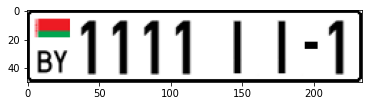

[WRONG REGION PREDICTED] pred 13[kg] -> 9[eu-ua-ordlo-lpr] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/test/img/eu-ua-ordlo-lpr.png


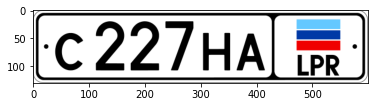

[WRONG REGION PREDICTED] pred 5[xx-transit] -> 14[am] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/test/img/am.png


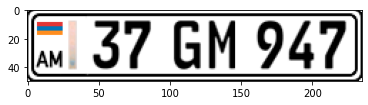

[WRONG REGION PREDICTED] pred 7[kz] -> 3[eu-ua-1995] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/test/img/eu-ua-1995.png


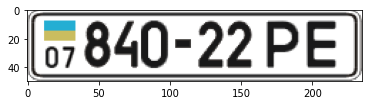

[WRONG REGION PREDICTED] pred 1[eu-ua-2015] -> 12[su] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/test/img/su.png


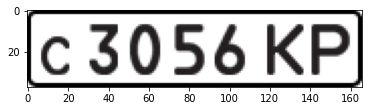

[WRONG REGION PREDICTED] pred 0[military] -> 10[ge] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/test/img/ge.png


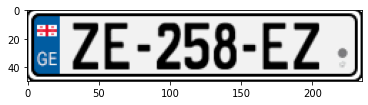

[WRONG REGION PREDICTED] pred 5[xx-transit] -> 2[eu-ua-2004] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/test/img/eu-ua-2004.png


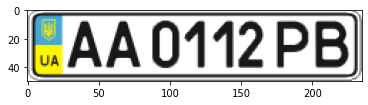

[WRONG REGION PREDICTED] pred 5[xx-transit] -> 4[eu] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/test/img/eu.png


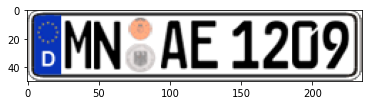

[WRONG REGION PREDICTED] pred 1[eu-ua-2015] -> 7[kz] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/test/img/kz.png


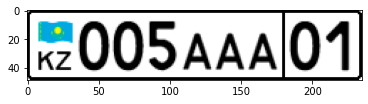

[WRONG REGION PREDICTED] pred 0[military] -> 6[ru] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/test/img/ru.png


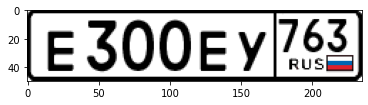

[WRONG REGION PREDICTED] pred 13[kg] -> 8[eu-ua-ordlo-dpr] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/test/img/eu-ua-ordlo-dpr.png


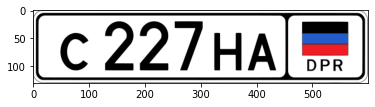

Wrong detection: 11 numberplates of 18


In [42]:
small_acc(npClassificator, os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"))

100%|██████████| 18/18 [00:00<00:00, 15078.38it/s]

start imageGenerator build
end imageGenerator build
[WRONG REGION PREDICTED] pred 1[eu-ua-2015] -> 7[kz] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/train/img/kz.png


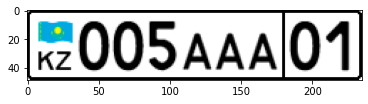

[WRONG REGION PREDICTED] pred 5[xx-transit] -> 4[eu] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/train/img/eu.png


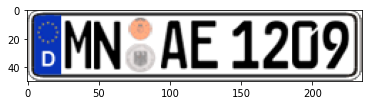

[WRONG REGION PREDICTED] pred 5[xx-transit] -> 2[eu-ua-2004] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/train/img/eu-ua-2004.png


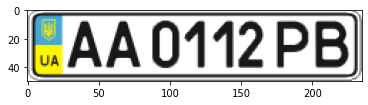

[WRONG REGION PREDICTED] pred 5[xx-transit] -> 14[am] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/train/img/am.png


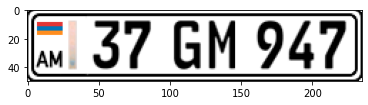

[WRONG REGION PREDICTED] pred 13[kg] -> 8[eu-ua-ordlo-dpr] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/train/img/eu-ua-ordlo-dpr.png


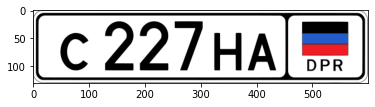

[WRONG REGION PREDICTED] pred 0[military] -> 6[ru] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/train/img/ru.png


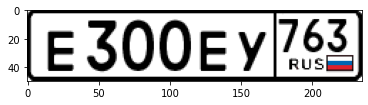

[WRONG REGION PREDICTED] pred 7[kz] -> 3[eu-ua-1995] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/train/img/eu-ua-1995.png


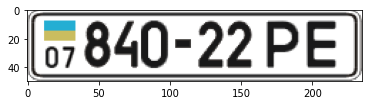

[WRONG REGION PREDICTED] pred 0[military] -> 10[ge] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/train/img/ge.png


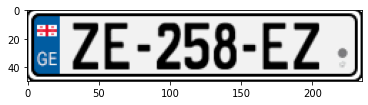

[WRONG REGION PREDICTED] pred 13[kg] -> 9[eu-ua-ordlo-lpr] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/train/img/eu-ua-ordlo-lpr.png


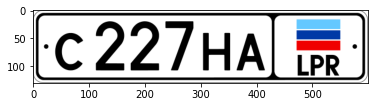

[WRONG REGION PREDICTED] pred 12[su] -> 11[by] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/train/img/by.png


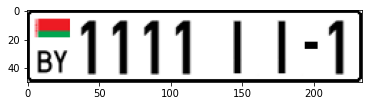

[WRONG REGION PREDICTED] pred 1[eu-ua-2015] -> 12[su] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/train/img/su.png


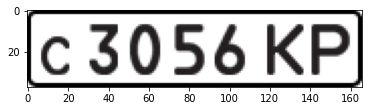

Wrong detection: 11 numberplates of 18


In [43]:
#small_acc(npClassificator, os.path.join(PATH_TO_REG_CUSTOM_DATASET, "train"))

100%|██████████| 18/18 [00:00<00:00, 5416.28it/s]

start imageGenerator build
end imageGenerator build
[WRONG REGION PREDICTED] pred 1[eu-ua-2015] -> 12[su] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/val/img/su.png


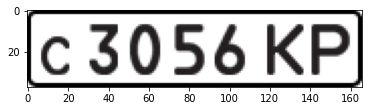

[WRONG REGION PREDICTED] pred 0[military] -> 6[ru] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/val/img/ru.png


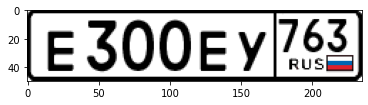

[WRONG REGION PREDICTED] pred 13[kg] -> 9[eu-ua-ordlo-lpr] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/val/img/eu-ua-ordlo-lpr.png


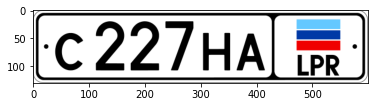

[WRONG REGION PREDICTED] pred 0[military] -> 10[ge] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/val/img/ge.png


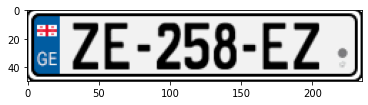

[WRONG REGION PREDICTED] pred 13[kg] -> 8[eu-ua-ordlo-dpr] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/val/img/eu-ua-ordlo-dpr.png


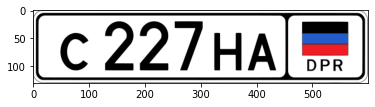

[WRONG REGION PREDICTED] pred 1[eu-ua-2015] -> 7[kz] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/val/img/kz.png


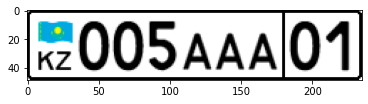

[WRONG REGION PREDICTED] pred 5[xx-transit] -> 2[eu-ua-2004] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/val/img/eu-ua-2004.png


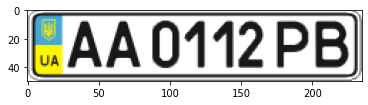

[WRONG REGION PREDICTED] pred 5[xx-transit] -> 4[eu] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/val/img/eu.png


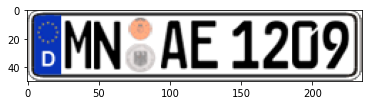

[WRONG REGION PREDICTED] pred 7[kz] -> 3[eu-ua-1995] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/val/img/eu-ua-1995.png


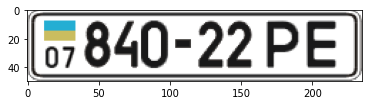

[WRONG REGION PREDICTED] pred 12[su] -> 11[by] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/val/img/by.png


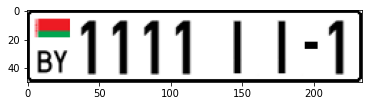

[WRONG REGION PREDICTED] pred 5[xx-transit] -> 14[am] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_base_reg/val/img/am.png


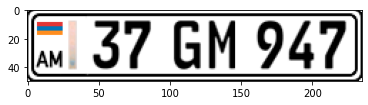

Wrong detection: 11 numberplates of 18


In [44]:
#small_acc(npClassificator, os.path.join(PATH_TO_REG_CUSTOM_DATASET, "val"))